In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
rand_state = 1000

In [3]:
#import data and see what we're working with

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df_raw = df
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [5]:
X = df.drop('CustomerID', axis=1) # scaling the features will be automatically done. 
CustomerID = df.CustomerID

In [6]:
from pca import pca

In [7]:
pca()

In [8]:
model=pca(n_components=3, normalize=True, random_state = rand_state) 

In [9]:
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [3] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [10]:
loadings=results['loadings']
loadings

,Age,Annual Income (k$),Spending Score (1-100)
PC1,0.706382,-0.048024,-0.706199
PC2,0.030141,0.998832,-0.037775
PC3,-0.707188,-0.005398,-0.707005


In [11]:
scores=results['PC']
scores['lables']=CustomerID
scores.head()

,PC1,PC2,PC3,lables
0,-0.615720,-1.763481,1.324232,1
1,-1.665793,-1.820747,0.069952,2
2,0.337862,-1.674799,2.179025,3
3,-1.456573,-1.772430,0.078029,4
4,-0.038465,-1.662740,0.687342,5


In [12]:
results['explained_var']

array([0.44266167, 0.77574546, 1.        ])

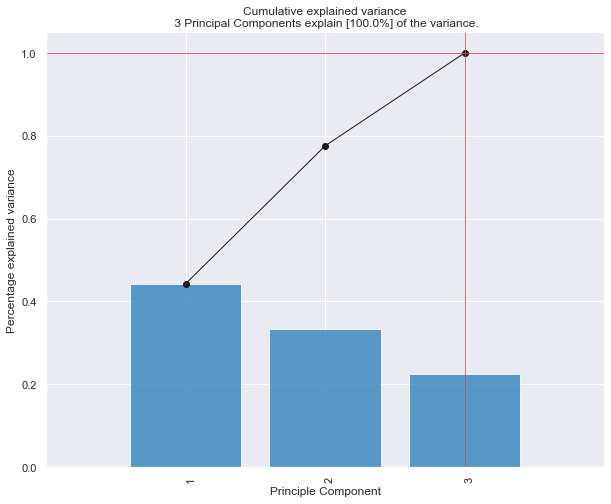

<Figure size 432x288 with 0 Axes>

In [13]:
model.plot(figsize=(10,8))
plt.show()

In this scree plot we see that the first PC explains the most of the variance in the data, around 45%. PC2 explains around 35% more and then PC3 explains the remaining 20% of the variance. Together, the three PCs explain 100% of the variance in the data.

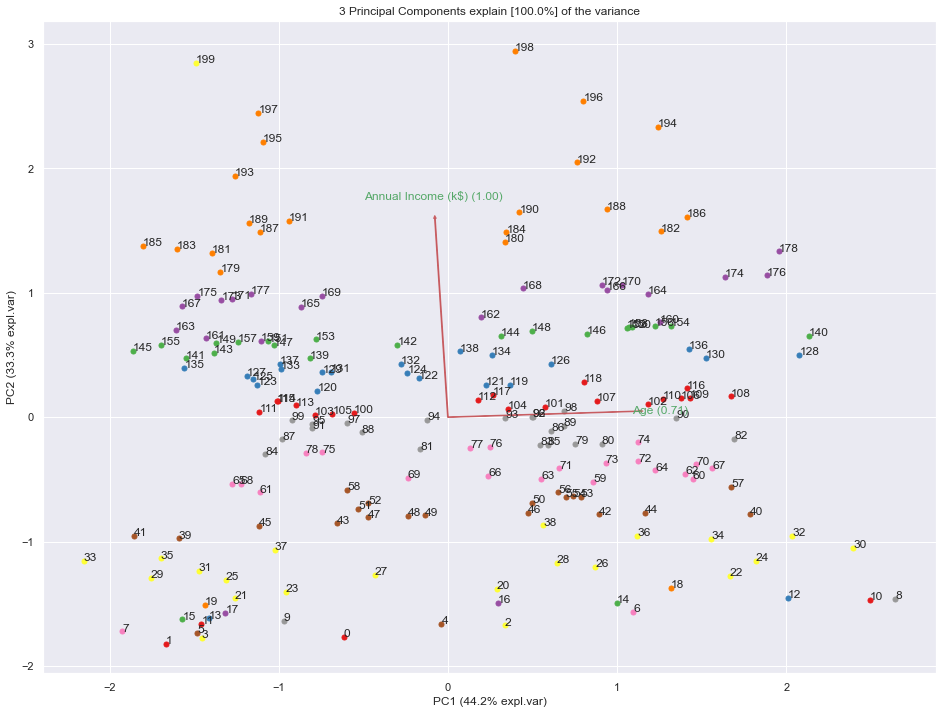

In [15]:
model.biplot(n_feat=2,  legend=False, figsize=(16,12), label=True)
plt.show()

The two features in the biplot are Annual Income and Age. Annual Income increases as PC2 increases, and Age increases as PC1 increases. 

There isn't a really clear split here, but we could recommend 4 segments to the management team:

one for when PC2 is high (above 1) and PC1 is low

one for when PC2 is high (above 1) and PC1 is high

one for when PC2 is low (below 1) and PC1 is low

one for when PC2 is low (below 1) and PC1 is high

In [14]:
from sklearn.decomposition import KernelPCA

In [15]:
kpca = KernelPCA(n_components = 3, kernel = 'rbf', random_state = rand_state)

In [16]:
kpca_transform = kpca.fit_transform(X)

In [17]:
explained_variance = numpy.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / numpy.sum(explained_variance)

In [18]:
numpy.cumsum(explained_variance_ratio)

array([0.35877014, 0.71471747, 1.        ])

In [21]:
numpy.sum(explained_variance_ratio)

1.0

The 3 principal components in this model are altogether explaining the same amount of the variance as the linear PCA (100%), but each component is only explaining around a third of the variance compared to the ~45, 30, 25 split in the linear PCA model.

We would prefer the linear PCA because we're able to create a scree plot and biplot, giving us much more visualization than we have with the Kernel PCA.